# Complex Num Visualization with Vectors 
[https://towardsdatascience.com/fourier-transform-for-time-series-plotting-complex-numbers-9743ffe8a8bb/](https://towardsdatascience.com/fourier-transform-for-time-series-plotting-complex-numbers-9743ffe8a8bb/)

## Preparation 

In [2]:
import json
from pylab import arange
import matplotlib.cm as cm
import requests
import pandas as pd
import cmath
import matplotlib.pyplot as plt
import numpy as np 

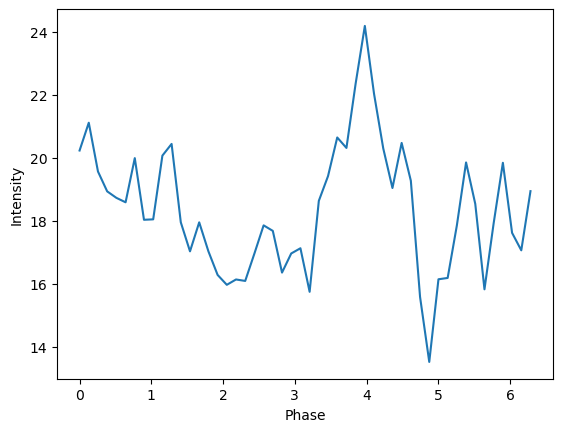

In [3]:
# Use new data 
data = pd.read_csv('/home/jovyan/PulsarProject/pulseProfileTvP.csv')
plt.plot(data['radians'], data['profile']) 
plt.xlabel('Phase') 
plt.ylabel('Intensity') 

# Cleaning by taking away average signal 
averagesignal = data['profile'].sum() / 50
cleaneddata = data['profile'] - averagesignal 

data['cleanedProfile'] = cleaneddata

## Coefficients 

In [4]:
# Create function   
def CosineCoeff(x): # Calculate the coefficient 
    if x == 0: 
        totalarea = 0 
        i = 0
        B = 2*np.pi / 1 # Where d - c = 1 
        h = 1 / 49 

        # Summation loop 
        for i in range(49): 
            area1 = h * (data.iat[i, 3] + data.iat[i+1, 3]) / 2 
            totalarea = totalarea + area1 

        # Calculate initial constant 
        a0 = (1/49) * totalarea 
        return a0
        print(a0)

    else: 
        totalarea = 0 
        i = 0
        B = 2*np.pi / 1 # Where d - c = 1 
        h = 1 / 49 

        # Summation loop 
        for i in range(49): 
            area1 = h * ((np.cos(x * B * data.iat[i, 0]) * data.iat[i, 3]) + (np.cos(x * B * data.iat[i+1, 0]) * data.iat[i+1, 3])) / 2
            totalarea = totalarea + area1 

        # Calculate initial constant 
        aN = (2/49) * totalarea
        return aN 

# Create function   
def SineCoeff(x): # Calculate the coefficient 
    totalarea = 0 
    i = 0
    B = 2*np.pi / 1 # Where d - c = 1 
    h = 1 / 49 

    # Summation loop 
    for i in range(49): 
        area1 = h * ((np.sin(x * B * data.iat[i, 0]) * data.iat[i, 3]) + (np.sin(x * B * data.iat[i+1, 0]) * data.iat[i+1, 3])) / 2
        totalarea = totalarea + area1 

    # Calculate initial constant 
    bN = (2/49) * totalarea
    return bN 

In [5]:
# Assign 
# Local variable needs universal assignment 
B = 2*np.pi / 1 # Where d - c = 1 

# Assign coefficients 
a0 = CosineCoeff(0)
a1 = CosineCoeff(1) 
a2 = CosineCoeff(2) 
a3 = CosineCoeff(3) 
a4 = CosineCoeff(4) 
a5 = CosineCoeff(5) 
a9 = CosineCoeff(9) 
a10 = CosineCoeff(10) 
a11 = CosineCoeff(11) 
a13 = CosineCoeff(13) 

b1 = SineCoeff(1)
b2 = SineCoeff(2) 
b3 = SineCoeff(3) 
b4 = SineCoeff(4) 
b5 = SineCoeff(5) 
b9 = SineCoeff(9) 
b10 = SineCoeff(10) 
b11 = SineCoeff(11) 
b13 = SineCoeff(13) 

Text(0, 0.5, 'Intensity')

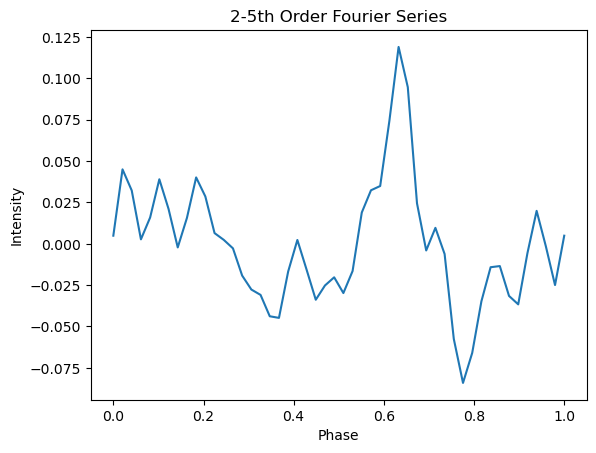

In [6]:
x = data['phase']
ypoints1 = a0 
ypoints2 = a2 * np.cos(2 * B * x) + b2 * np.sin(2 * B * x) 
ypoints3 = a3 * np.cos(3 * B * x) + b3 * np.sin(3 * B * x) 
ypoints4 = a4 * np.cos(4 * B * x) + b4 * np.sin(4 * B * x) 
ypoints5 = a5 * np.cos(5 * B * x) + b5 * np.sin(5 * B * x) 
ypoints9 = a9 * np.cos(9 * B * x) + b9 * np.sin(9 * B * x) 
ypoints10 = a10 * np.cos(10 * B * x) + b10 * np.sin(10 * B * x) 
ypoints11 = a11 * np.cos(11 * B * x) + b11 * np.sin(11 * B * x) 
ypoints13 = a13 * np.cos(13 * B * x) + b13 * np.sin(13 * B * x) 

ally = ypoints1 + ypoints2 + ypoints3 + ypoints4 + ypoints5 + ypoints9 + ypoints10 + ypoints11 + ypoints13 

plt.plot(x, ally) 
plt.title("2-5th Order Fourier Series") 
plt.xlabel("Phase") 
plt.ylabel("Intensity") 

## Helping function 

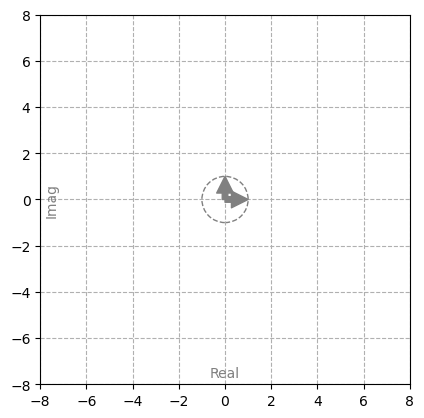

In [7]:
# We start by defininf helper functions
# one to pretify an axes
def pretty_ax(ax, b: float=8):
    """Prettify an Axes for plotting complex numbers: 
        - Add labels
        - Set aspect to 'equal'
        - Add grid
        - Add unit circle with canonical vectors
        - Set custom value for boundaries of axes
    """
    ax.set_aspect('equal')
    ax.set_xlabel("Real", color="gray")
    ax.set_ylabel("Imag", color="gray")
    ax.xaxis.set_label_coords(0.5,0.05)
    ax.yaxis.set_label_coords(0.05,0.5)

    ax.grid(ls='--')
    c = plt.Circle((0,0), 1, ls='--', facecolor=None, edgecolor="gray", fill=False)
    ax.add_patch(c)
    ax.set_xlim(-b, b)
    ax.set_ylim(-b, b)
    plot_vector(1, ax, color="gray")
    plot_vector(1j, ax, color="gray")

# one to plot complex numbers to a 2D ax
def plot_vector(
        Z, ax, 
        color=None, decomp=False, txt=False, 
        orig=0+0J, ls=None, alpha=1, 
        arrowstyle=None, width=None, 
        headwidth=None, frac=None
    ):
    """Plot a complex number as vector.

    """
    x = Z.real
    y = Z.imag

    arrow_props = dict(
        color=color,
        ls=ls,
        edgecolor=None,
        alpha=alpha,
    )
    if arrowstyle is None:
        if width is not None:
            arrow_props["width"] = width   # width of the arrow in points
        if headwidth is not None:
            arrow_props["headwidth"] = headwidth   #  width of the base of the arrow head in points
        arrow_props['shrink'] = 0.0 # move the tip and base some percent away from the annotated point and text
        if frac is not None:
            arrow_props['frac'] = frac  # fraction of the arrow length occupied by the head
    else:
        arrow_props['arrowstyle'] = arrowstyle

    ann = ax.annotate("", 
                    xy=((Z+orig).real, (Z+orig).imag),
                    xytext=(orig.real, orig.imag),
                    arrowprops=arrow_props,
                    annotation_clip=False)
    ann.arrow_patch.set_clip_box(ax.bbox)
    if decomp:
        ann = ax.annotate('', xy=(x, 0), xytext=(orig.real, orig.imag), arrowprops=dict(arrowstyle="->", color=color), annotation_clip=False)
        ann.arrow_patch.set_clip_box(ax.bbox)
        ann = ax.annotate('', xy=(x, y), xytext=(x,0), arrowprops=dict(arrowstyle="->", color=color), annotation_clip=False)
        ann.arrow_patch.set_clip_box(ax.bbox)
    if txt:
        ax.text(x/2, y/2, f'Z={Z}', ha='center', va='bottom', rotation=np.angle(Z)*180/np.pi, color=color)

fig, ax = plt.subplots()
# prettify the ax for plotting complex numbers
pretty_ax(ax)

## Visualising of imaginary components 

(-0.4, 0.6)

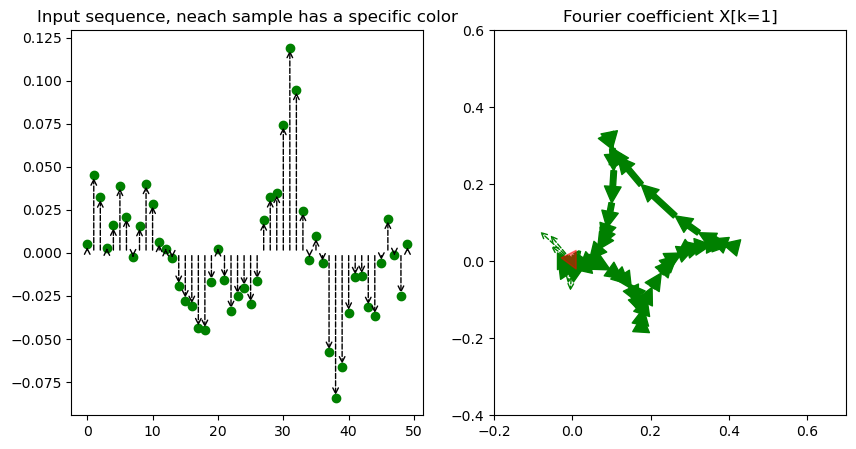

In [8]:
from matplotlib.cm import viridis

##### Fourier Transform ##### 

import scipy as sp 
# Number of sample points
N = 50 
# sample spacing
T = 0.00008192 
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = sp.fft.fft(ally)
xf = sp.fft.fftfreq(N, T)[:N//2]

""" 
# Omit graph for now 
plt.stem(xf, 1.0/N * np.abs(yf[0:N//2]))
plt.title("Fast Fourier Transformation of Pulsar Signal") 
plt.xlabel("Frequency") 
plt.ylabel("Power") 
plt.grid() 
"""

##### End Fourier Transform ##### 

from matplotlib.cm import viridis

N = 50
colors = viridis(data['phase'])

x_n = ally 
ns = np.arange(0, 50)

k = 1
Z_ks = x_n * np.exp(-2*1J*np.pi*k*ns/N)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].scatter(ns, x_n, marker='o', c='g')
axes[0].set_title('Input sequence, neach sample has a specific color')

for i, x in enumerate(x_n):
    _Zx = 1J * x
    plot_vector(_Zx, axes[0], arrowstyle="->", ls='--', orig=i)

def plot_sum_vector(Z_ks, ax, colors=colors):
    cumsum = 0
    for Zk, color in zip(Z_ks, colors):
        plot_vector(Zk, ax=ax, color='g', arrowstyle='->', ls='--')
        plot_vector(Zk, orig=cumsum, ax=ax, color='g')
        cumsum += Zk
    plot_vector(cumsum, ax=ax, color="red", alpha=0.5)

plot_sum_vector(Z_ks, axes[1])
axes[1].set_title('Fourier coefficient X[k=1]') 
axes[1].set_xlim(-0.2, 0.7) 
axes[1].set_ylim(-0.4, 0.6) 

Text(0, 0.5, 'Power (dB)')

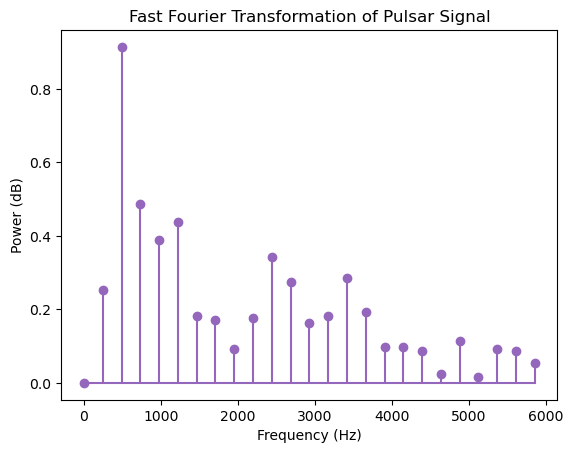

In [9]:
import scipy as sp 
# Number of sample points
N = 50 
# sample spacing
T = 0.00008192 
x = np.linspace(0.0, N*T, N, endpoint=False)
y = ally
yf = sp.fft.fft(data['cleanedProfile'])
xf = sp.fft.fftfreq(N, T)[:N//2]

plt.stem(xf, 1.0/N * np.abs(yf[0:N//2]), linefmt = 'C4', basefmt = 'C4') # 1/N or 2/N 
plt.title("Fast Fourier Transformation of Pulsar Signal") 
plt.xlabel("Frequency (Hz)") 
plt.ylabel("Power (dB)") 

In [11]:
# Cite code 

In [12]:
type(yf)
new = pd.DataFrame({'real': yf.real, 'imag': yf.imag})

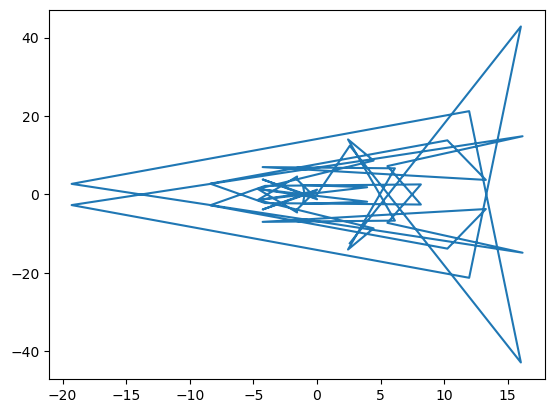

In [16]:
plt.plot(new['real'], new['imag']) 

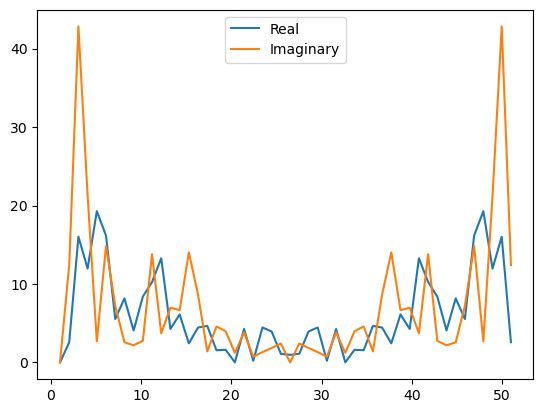

In [46]:
plt.plot(np.linspace(1,51,50), abs(new['real']), label = 'Real')
plt.plot(np.linspace(1,51,50), abs(new['imag']), label = 'Imaginary')
plt.legend()

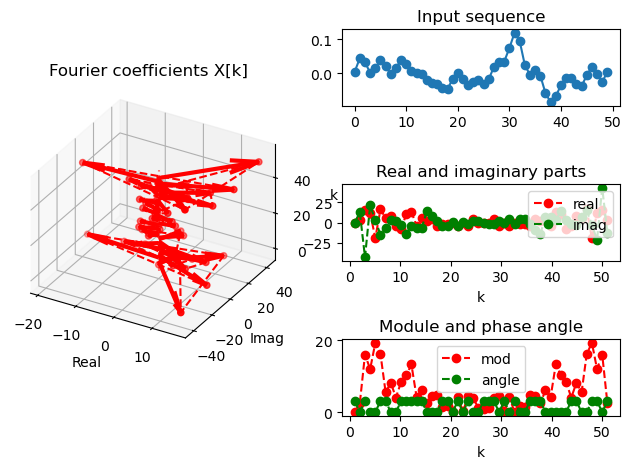

In [18]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d', proj_type = 'ortho')

ks = np.linspace(1,51,50)
Zs = ks
Xs = new['real'] 
Ys = new['imag']

ax.plot(Xs, Ys, Zs, "--", color='red')
ax.scatter(Xs, Ys, Zs, '-o', color='red')#colors)
ax.set_xlabel('Real')
ax.set_ylabel('Imag')
ax.set_zlabel('k')
ax.set_title("Fourier coefficients X[k]")
ax.quiver(np.zeros_like(Xs), np.zeros_like(Xs), ks,
            Xs, Ys, np.zeros_like(Xs),
            colors='red',#colors, 
            arrow_length_ratio = 0.3, lw=3)
zmin, zmax = ax.get_zlim()
ax.plot([0,0], [0,0], [zmin, zmax], color="r", alpha=0.5, ls="--")

ax = fig.add_subplot(322)
ax.plot(x_n, '-o')
ax.set_title("Input sequence")

ax = fig.add_subplot(324)
ax.plot(ks, Xs, '--o', color="r", label="real")
ax.plot(ks, Ys, '--o', color="g", label='imag')
ax.set_title('Real and imaginary parts')
ax.set_xlabel("k")
ax.legend()

ax = fig.add_subplot(326)
ax.plot(ks, np.abs(Xs), '--o', color="r", label="mod")
ax.plot(ks, np.angle(Ys), '--o', color="g", label='angle')
ax.set_title('Module and phase angle')
ax.set_xlabel("k")    
ax.legend()
fig.tight_layout()

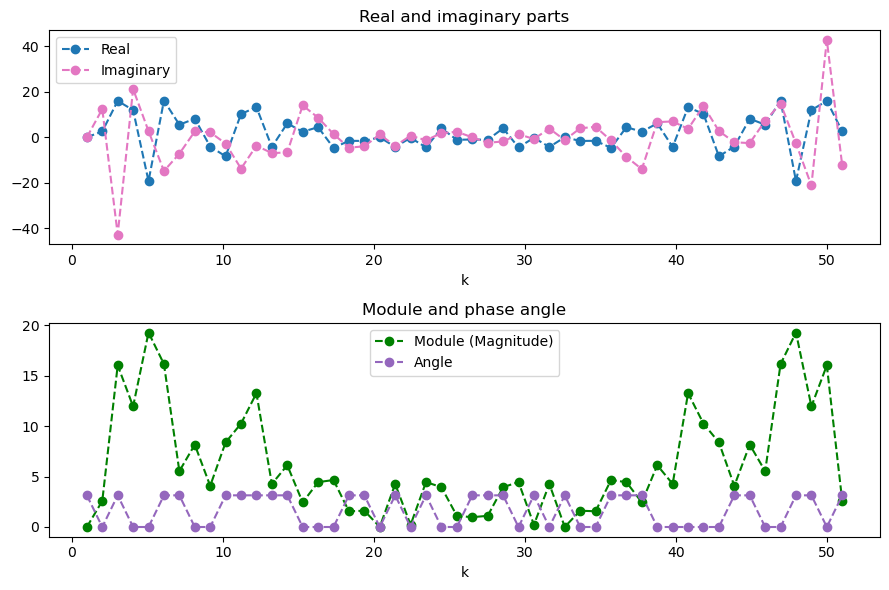

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(9,6)) 

ax[0].plot(ks, Xs, '--o', label="Real")
ax[0].plot(ks, Ys, '--o', color="C6", label='Imaginary')
ax[0].set_title('Real and Imaginary Components of Fourier Transformation')
ax[0].set_xlabel("k")
ax[0].legend()

ax[1].plot(ks, np.abs(Xs), '--o', color="g", label="Module (Magnitude)")
ax[1].plot(ks, np.angle(Ys), '--o', color="C4", label='Angle')
ax[1].set_title('Module and phase angle')
ax[1].set_xlabel("k")    
ax[1].legend()

fig.tight_layout()